<a href="https://colab.research.google.com/github/Danya-2003/MLHW/blob/main/AMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2 as cv

In [ ]:
SIZE = 511

DIRECTORIES = [
    "drive/MyDrive/Норма",
    "drive/MyDrive/AMD",
]
TRAIN_SIZE = 0.5
# 265 Норма
# 91 AMD
N_LAYERS = 8
SIZE = 2**(N_LAYERS + 1) - 1

CHANNEL_MUL = 1.6

**Dataset**

In [ ]:
X_all = [] #картинки
Y_all = [] #индексы

for i, dir in enumerate(DIRECTORIES):
  for filename in glob.glob(dir + "/*.jpg"):    
    img = cv.imread(filename)
    img = img / 255.0
    img = cv.resize(img, (SIZE, SIZE))
    X_all.append(img)
    Y_all.append(i)

X_all = np.asarray(X_all)
Y_all = np.asarray(Y_all)

In [ ]:
ind = list(range(len(X_all)))
np.random.shuffle(ind)
ind_train = ind[:int(len(ind) * TRAIN_SIZE)]
ind_test = ind[int(len(ind) * TRAIN_SIZE):]

X_train, Y_train = X_all[ind_train], Y_all[ind_train]
X_test, Y_test = X_all[ind_test], Y_all[ind_test]

**Model**

(3, 3, 3, 2)


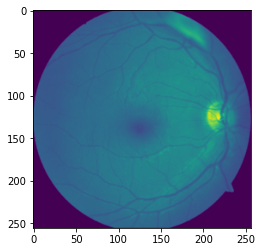

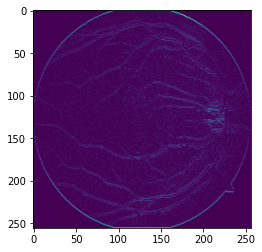

(1, 256, 256, 2)


In [ ]:
K1 = np.ones((3, 3, 3, 1)) / 27
K2 = np.expand_dims(np.linspace(-1, 1, 3), axis=(1,2,3)) * np.ones((3, 3, 3, 1))

K = np.concatenate([K1, K2], axis=-1)

print(K.shape)

y = tf.nn.conv2d(X_test[0:1], K, (2, 2), padding='SAME')
plt.imshow(np.abs(y[0,:,:,0]))
plt.show()
plt.imshow(np.abs(y[0,:,:,1]))
plt.show()
print(y.shape)

In [ ]:
def Model():
    input = tf.keras.layers.Input(shape=(SIZE, SIZE, 3))

    x = input

    for i in range(N_LAYERS):
      Cin = x.shape[-1]
      Cout = int(CHANNEL_MUL * Cin)

      x = tf.keras.layers.Conv2D(Cout, (3, 3), strides=(2, 2))(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.ReLU(6)(x)

      x = tf.keras.layers.Dropout(0.2)(x)
      
      print(x.shape)

    x = tf.keras.layers.Flatten()(x)
    print(x.shape)

    x = tf.keras.layers.Dense(1)(x)
    x = tf.keras.layers.Activation('sigmoid')(x)
    print(x.shape)

    return tf.keras.Model(inputs=input, outputs=x)

model = Model()

(None, 255, 255, 4)
(None, 127, 127, 6)
(None, 63, 63, 9)
(None, 31, 31, 14)
(None, 15, 15, 22)
(None, 7, 7, 35)
(None, 3, 3, 56)
(None, 1, 1, 89)
(None, 89)
(None, 1)


In [ ]:
model.compile(loss='binary_crossentropy', metrics='accuracy')

In [ ]:
weights = {0: 1 / np.average(Y_train == 0), 1: 1 / np.average(Y_train == 1)}

model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), class_weight=weights)

Epoch 1/100
6/6 [==============================] - 1s 240ms/step - loss: 0.2272 - accuracy: 0.9763 - val_loss: 0.4389 - val_accuracy: 0.8706
Epoch 2/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0684 - accuracy: 0.9882 - val_loss: 0.4267 - val_accuracy: 0.8765
Epoch 3/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0643 - accuracy: 0.9941 - val_loss: 0.4357 - val_accuracy: 0.8882
Epoch 4/100
6/6 [==============================] - 1s 127ms/step - loss: 0.1487 - accuracy: 0.9704 - val_loss: 0.5199 - val_accuracy: 0.8824
Epoch 5/100
6/6 [==============================] - 1s 124ms/step - loss: 0.0640 - accuracy: 1.0000 - val_loss: 0.4899 - val_accuracy: 0.8647
Epoch 6/100
6/6 [==============================] - 1s 118ms/step - loss: 0.1073 - accuracy: 0.9822 - val_loss: 0.5013 - val_accuracy: 0.8824
Epoch 7/100
6/6 [==============================] - 1s 120ms/step - loss: 0.1388 - accuracy: 0.9822 - val_loss: 0.5346 - val_accuracy: 0.8882
Epoch 8/100
6

NameError: ignored

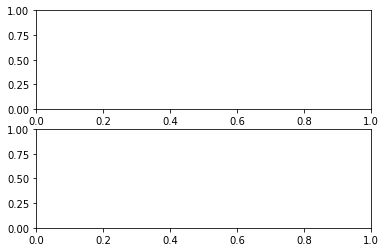

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

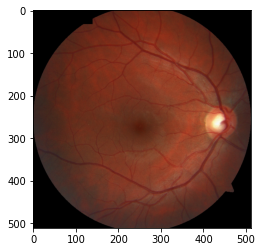

Pred: [False], Real: False


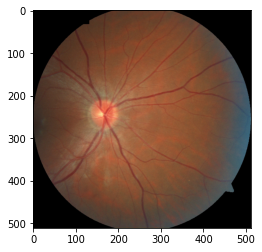

Pred: [False], Real: False


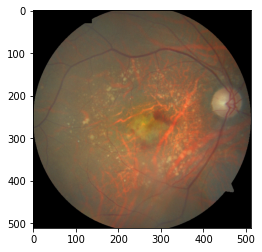

Pred: [False], Real: True


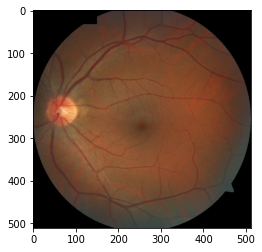

Pred: [False], Real: False


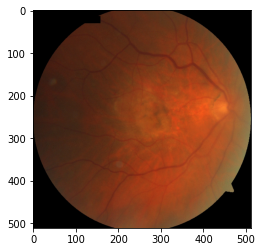

Pred: [False], Real: True


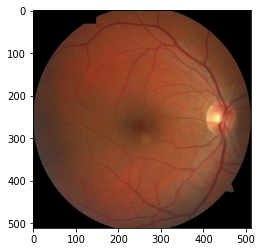

Pred: [False], Real: False


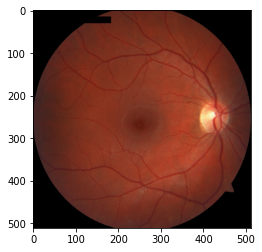

Pred: [False], Real: False


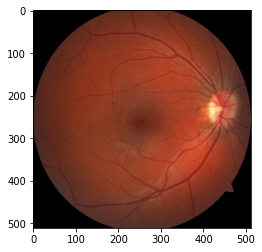

Pred: [False], Real: False


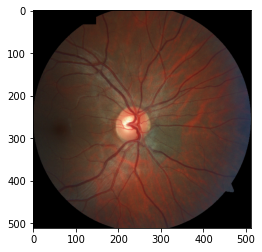

Pred: [False], Real: False


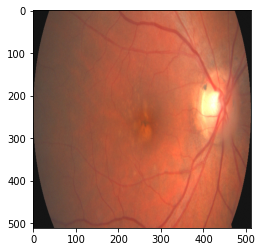

Pred: [ True], Real: True


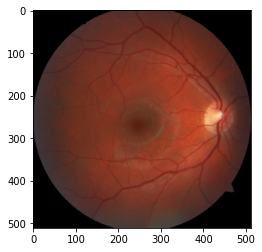

Pred: [False], Real: False


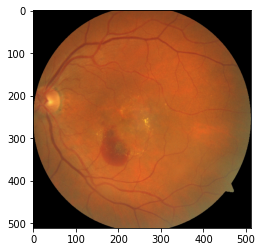

Pred: [ True], Real: True


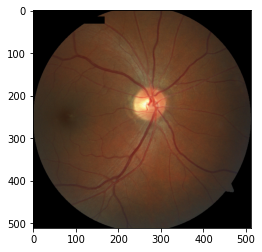

Pred: [False], Real: False


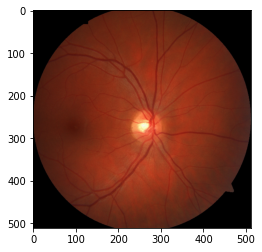

Pred: [False], Real: False


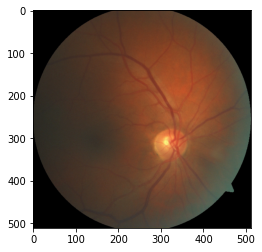

Pred: [False], Real: False


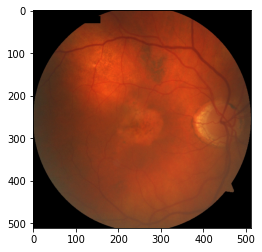

Pred: [False], Real: True


In [ ]:
ind = np.random.choice(list(range(len(X_all))), 16)
X_i = X_all[ind]
Y_i = Y_all[ind]

Y_pred = model.predict(X_i)

for i in range(16):
    plt.imshow(X_i[i,:,:,::-1])
    plt.show()
    print(f"Pred: {Y_pred[i] > 0.5}, Real: {Y_i[i] > 0.5}")

In [ ]:
model.save("classifier.AMD")

INFO:tensorflow:Assets written to: classifier.AMD/assets


In [ ]:
# model = tf.keras.models.load_model("classifier.AMD")

# y_pred = model.predict(x)